# 시계열 데이터

## 12-1. datetime 오브젝트
- datetime 라이브러리: 날짜와 시간 처리하는 등의 다양한 기능 제공하는 파이썬 라이브러리
  - date 오브젝트: 날짜 처리
  - time 오브젝트: 시간 처리
  - datetime 오브젝트: 날짜, 시간 처리

### datetime 오브젝트 사용하기

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

2023-09-27 12:45:55.287226


In [3]:
now2 = datetime.today()
print(now2)

2023-09-27 12:46:06.243776


In [4]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)
print(t1)
print(t2)
print(t3)

2023-09-27 12:47:56.406786
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
diff1 = t1-t2
print(diff1)
print(type(diff1))

19627 days, 12:47:56.406786
<class 'datetime.timedelta'>


In [6]:
diff2 = t2-t1
print(diff2)
print(type(diff2))

-19628 days, 11:12:03.593214
<class 'datetime.timedelta'>


### datetime 오브젝트로 변환하기 - to_datetime 메서드
#### 문자열을 datetime 오브젝트로 변환

In [10]:
# ebola 데이터 집합 불러오기
import pandas as pd
import os
ebola = pd.read_csv('country_timeseries.csv')

In [11]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [12]:
# to_datetime 메서드 사용해 Date 열의 자료형을 datetime 오브젝트로 변환 후 새로운 열로 추가
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [13]:
# 시간 형식 지정자 %d, %m, %y와 기호를 조합해 format 인자에 전달해 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있음
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')
print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [14]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


In [15]:
now = datetime.now()
print(now)

2023-09-27 13:18:49.670526


In [16]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2023-09-27


In [17]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

13:18:49


In [18]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2023-09-27 13:18:49


### datetime 오브젝트로 변환하기 - read_csv 메서드
#### datetime 오브젝트로 변환하려는 열을 지정해 데이터 집합 불러오기

In [19]:
# parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열을 전달해 데이터 집합 불러옴. Date 열이 문자열이 아니라 datetime 오브젝트라는 것을 확인 가능.
ebola1 = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### datetime 오브젝트에서 날짜 정보 추출하기

In [20]:
# 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [21]:
# datetime 의 year month day 속성을 이용해 년 월 일 정보 추출
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


### dt 접근자 사용하기
dt 접근자를 사용해 datetime 속성이나 메서드를 사용해 시계열 데이터 처리
#### dt 접근자로 시계열 데이터 정리하기

In [22]:
# ebola 데이터 집합을 불러와 datetime 오브젝트로 변환해 새로운 열 추가
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [23]:
# dt 접근자 사용하지 않고 인덱스가 3인 데이터의 년 월 일 데이터 추출
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [24]:
print(ebola['date_dt'][3].year)

2015


In [25]:
print(ebola['date_dt'][3].month)

1


In [26]:
print(ebola['date_dt'][3].day)

2


In [27]:
# date_dt 열에 dt 접근자로 접근 후 year 속성을 이용해 연도값 추출
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [28]:
# 월, 일 데이터를 한번에 추출해 새로운 열로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [29]:
# ebola 데이터프레임에 새로 추가한 열의 자료형 출력
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 12-2. 사례별 시계열 데이터 계산하기
### 에볼라 최초 발병일 계산하기

In [30]:
# ebola 데이터 프레임의 마지막 행과 열 5개씩 살펴보기. 시간 역순으로 정렬됨. 시간 순으로 데이터를 살펴보려면 데이터 프레임의 마지막부터 살펴보기
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [31]:
# 에볼라 발생 시작날은 2014년 3월 22일. min 메소드 사용해 에볼라의 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [32]:
# Date 열에서 에볼라의 최초 발병일을 빼면 에볼라 진행 정도 확인 가능
ebola['outbreak_d']= ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


### 파산한 은행의 개수 계산하기

In [33]:
# 파산한 은행 데이터 집합. banks 데이터프레임의 앞부분인 closing date, updated date 열의 데이터 자료형이 시계열 데이터
banks = pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


In [34]:
# closing date, updated date 열의 자료형은 문자열. 두 열을 parse_dates 속성 이용해 변환하여 불러오기
banks_no_dates = pd.read_csv('banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB
None


In [35]:
banks = pd.read_csv('banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [40]:
# dt 접근자와 quarter 속성을 이용해 은행이 파산한 분기 알아내기.
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

In [41]:
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  \
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
2  58302                         Whitney Bank   2017-04-28   2017-07-26   
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18   
4  19328                  State Bank of Texas   2017-01-27   2017-05-18   

   closing_quater  closing_year  closing_quarter  
0               2

In [42]:
# groupby를 사용해 연도별 파산한 은행 개수 구하기
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [43]:
# 각 연도별 분기별로 파산한 은행 개수
closing_year_q = banks.groupby(['closing_year','closing_quater']).size()
print(closing_year_q)

closing_year  closing_quater
2000          4                  2
2001          1                  1
              2                  1
              3                  2
2002          1                  6
              2                  2
              3                  1
              4                  2
2003          1                  1
              2                  1
              4                  1
2004          1                  3
              2                  1
2007          1                  1
              3                  1
              4                  1
2008          1                  2
              2                  2
              3                  9
              4                 12
2009          1                 21
              2                 24
              3                 50
              4                 45
2010          1                 41
              2                 45
              3                 41
              4           

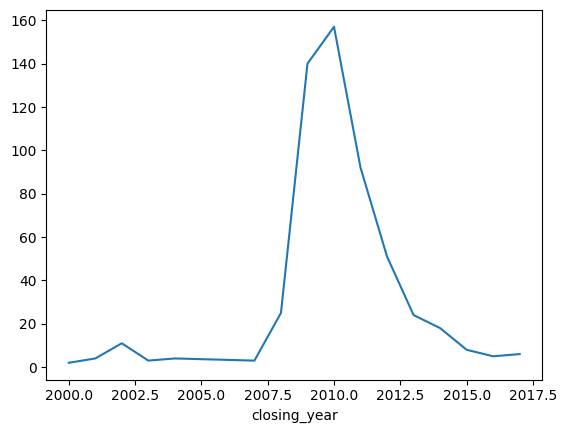

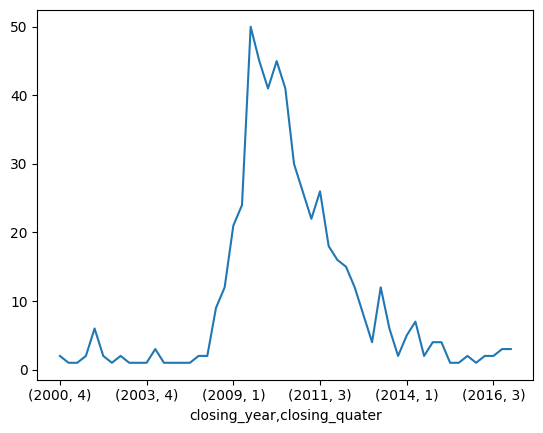

In [44]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

### 테슬라 주식 데이터로 시간 계산하기
pandas-datareader 라이브러리를 이용한 주식 데이터 불러오기

In [45]:
%pip install pandas-datareader

In [49]:
# get_data_quandal 메서드에 TSLA라는 문자열을 전달해 테슬라의 주식 데이터 다운받아 저장
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
tesla = pdr.get_data_quandl('TSLA', api_key = 'LZC7A6sj-caaKbG2ZY-a')
tesla.to_csv('./tesla_stock_quandl.csv')

In [50]:
# tesla 데이터프레임의 date 열이 문자열로 저장되어 있어 datetime으로 자료형 변환
print(tesla.head())

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, ExDividend, SplitRatio, AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume]
Index: []


In [51]:
tesla = pd.read_csv('tesla-stock-price.csv')
tesla.head() # 완전히 같은 데이터는 아니지만 데이터를 찾을 수 없어 일단 진행하겠습니다.

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [55]:
tesla = pd.read_csv('tesla-stock-price.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    757 non-null    datetime64[ns]
 1   close   757 non-null    float64       
 2   volume  757 non-null    object        
 3   open    757 non-null    float64       
 4   high    757 non-null    float64       
 5   low     757 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 35.6+ KB
None


In [57]:
# 2018년 6월 데이터 추출
print(tesla.loc[(tesla.date.dt.year==2018)&(tesla.date.dt.month==6)])

         date   close         volume     open      high      low
75 2018-06-29  342.95   6475903.0000  353.330  353.8600  342.410
76 2018-06-28  349.93   8388172.0000  348.660  357.0200  346.110
77 2018-06-27  344.50   8313817.0000  345.000  350.7900  339.500
78 2018-06-26  342.00   7434749.0000  336.054  343.5500  325.799
79 2018-06-25  333.01   6925089.0000  330.120  338.4700  327.500
80 2018-06-22  333.63  10253770.0000  351.540  352.2500  332.000
81 2018-06-21  347.51   7949846.0000  362.000  366.2139  346.270
82 2018-06-20  362.22   8370268.0000  358.040  364.3800  352.000
83 2018-06-19  352.55  12734840.0000  365.160  370.0000  346.250
84 2018-06-18  370.83  12025450.0000  355.400  373.7300  354.500
85 2018-06-15  358.17  10827560.0000  353.840  364.6700  351.250
86 2018-06-14  357.72  10961150.0000  347.630  358.7500  346.600
87 2018-06-13  344.78   9401467.0000  346.706  347.2000  339.800
88 2018-06-12  342.77  22256430.0000  344.700  354.9700  338.000
89 2018-06-11  332.10  13

### datetime 오브젝트와 인덱스 - DatetimeIndex
datetime 오브젝트를 데이터 프레임의 인덱스로 설정해 원하는 시간의 데이터를 바로 추출 가능
#### datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

In [58]:
# date 열을 tesla 데이터 프레임의 인덱스로 지정
tesla.index = tesla['date']
print(tesla.index)

DatetimeIndex(['2023-09-27 11:34:00', '2018-10-15 00:00:00',
               '2018-10-12 00:00:00', '2018-10-11 00:00:00',
               '2018-10-10 00:00:00', '2018-10-09 00:00:00',
               '2018-10-08 00:00:00', '2018-10-05 00:00:00',
               '2018-10-04 00:00:00', '2018-10-03 00:00:00',
               ...
               '2015-10-28 00:00:00', '2015-10-27 00:00:00',
               '2015-10-26 00:00:00', '2015-10-23 00:00:00',
               '2015-10-22 00:00:00', '2015-10-21 00:00:00',
               '2015-10-20 00:00:00', '2015-10-19 00:00:00',
               '2015-10-16 00:00:00', '2015-10-15 00:00:00'],
              dtype='datetime64[ns]', name='date', length=757, freq=None)


In [59]:
# 2015년 데이터 추출
print(tesla['2015'].iloc[:5,:5])

                 date   close        volume    open     high
date                                                        
2015-12-31 2015-12-31  240.01  2713817.0000  238.51  243.450
2015-12-30 2015-12-30  238.09  3694448.0000  236.60  243.634
2015-12-29 2015-12-29  237.19  2402438.0000  230.06  237.720
2015-12-28 2015-12-28  228.95  1900171.0000  231.49  231.980
2015-12-24 2015-12-24  230.57   710277.0000  230.56  231.880


<ipython-input-59-bcddfd372997>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5,:5])


In [60]:
# 2018년 6월 데이터 추출
print(tesla['2018-06'].iloc[:,:5])

                 date   close         volume     open      high
date                                                           
2018-06-29 2018-06-29  342.95   6475903.0000  353.330  353.8600
2018-06-28 2018-06-28  349.93   8388172.0000  348.660  357.0200
2018-06-27 2018-06-27  344.50   8313817.0000  345.000  350.7900
2018-06-26 2018-06-26  342.00   7434749.0000  336.054  343.5500
2018-06-25 2018-06-25  333.01   6925089.0000  330.120  338.4700
2018-06-22 2018-06-22  333.63  10253770.0000  351.540  352.2500
2018-06-21 2018-06-21  347.51   7949846.0000  362.000  366.2139
2018-06-20 2018-06-20  362.22   8370268.0000  358.040  364.3800
2018-06-19 2018-06-19  352.55  12734840.0000  365.160  370.0000
2018-06-18 2018-06-18  370.83  12025450.0000  355.400  373.7300
2018-06-15 2018-06-15  358.17  10827560.0000  353.840  364.6700
2018-06-14 2018-06-14  357.72  10961150.0000  347.630  358.7500
2018-06-13 2018-06-13  344.78   9401467.0000  346.706  347.2000
2018-06-12 2018-06-12  342.77  22256430.

<ipython-input-60-cdea620a7a21>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2018-06'].iloc[:,:5])


### 시간 간격과 인덱스 - TimedeltaIndex
####시간 간격을 인덱스로 지정해 데이터 추출.

In [61]:
# date 열에서 date 열의 최솟값을 빼면 데이터 수집 이후 시간이 얼마나 흘렀는지 알 수 있다.
tesla['ref_date'] = tesla['date'] - tesla['date'].min()
print(tesla.head())

                                   date   close         volume    open  \
date                                                                     
2023-09-27 11:34:00 2023-09-27 11:34:00  270.49      4,787,699  264.50   
2018-10-15 00:00:00 2018-10-15 00:00:00  259.59   6189026.0000  259.06   
2018-10-12 00:00:00 2018-10-12 00:00:00  258.78   7189257.0000  261.00   
2018-10-11 00:00:00 2018-10-11 00:00:00  252.23   8128184.0000  257.53   
2018-10-10 00:00:00 2018-10-10 00:00:00  256.88  12781560.0000  264.61   

                       high       low           ref_date  
date                                                      
2023-09-27 11:34:00  273.88  262.2400 2904 days 11:34:00  
2018-10-15 00:00:00  263.28  254.5367 1096 days 00:00:00  
2018-10-12 00:00:00  261.99  252.0100 1093 days 00:00:00  
2018-10-11 00:00:00  262.25  249.0300 1092 days 00:00:00  
2018-10-10 00:00:00  265.51  247.7700 1091 days 00:00:00  


In [62]:
# ref_date열을 인덱스로 지정
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

                                  date   close         volume    open    high
ref_date                                                                     
2904 days 11:34:00 2023-09-27 11:34:00  270.49      4,787,699  264.50  273.88
1096 days 00:00:00 2018-10-15 00:00:00  259.59   6189026.0000  259.06  263.28
1093 days 00:00:00 2018-10-12 00:00:00  258.78   7189257.0000  261.00  261.99
1092 days 00:00:00 2018-10-11 00:00:00  252.23   8128184.0000  257.53  262.25
1091 days 00:00:00 2018-10-10 00:00:00  256.88  12781560.0000  264.61  265.51


In [63]:
# 데이터 수집 이후 최초 5일 데이터 추출
print(tesla['5 days':].iloc[:5,:5])

               date   close         volume    open      high
ref_date                                                    
5 days   2015-10-20  213.03  14877020.0000  227.72  228.6000
4 days   2015-10-19  228.10   2506836.0000  226.50  231.1500
1 days   2015-10-16  227.01   4327574.0000  223.04  230.4805
0 days   2015-10-15  221.31   2835920.0000  216.43  221.7300


### 시간 범위와 인덱스
특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보기 위한 방식

#### 시간 범위 생성해 인덱스로 지정하기

In [64]:
# 에볼라 데이터 집합 사용. 2015년 1월 1일 데이터 누락
ebola = pd.read_csv('country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [65]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [66]:
# date_range 메서드를 사용해 시간 인덱스 생성
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [67]:
# 원본 데이터 손상 방지 위해 ebola 데이터 프레임의 앞 5개 데이터 추출해 새로운 데이터프레임 만들기.
# Date 열을 인덱스로 먼저 지정 후 생성한 시간 범위를 인덱스로 지정
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


### 시간 범위 수정하고 데이터 밀어내기 - shift 메서드
나라별로 에볼라 확산 속도 비교하려면 발생 시작 날짜를 옮기는 것이 좋음.

#### 에볼라의 확산 속도 비교하기

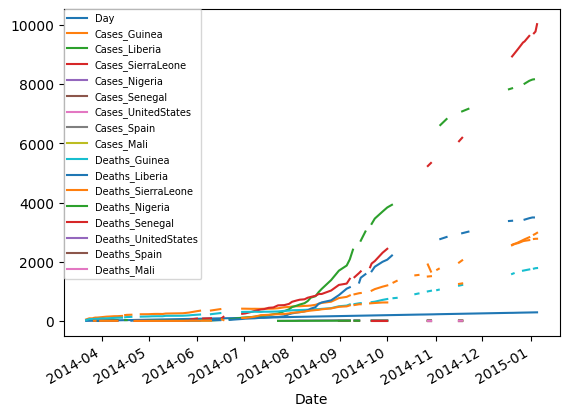

In [68]:
# ebola 데이터프레임의 Date 열을 인덱스로 지정 후 x축을 Date열로 y 축을 사망주 수로 지정하여 그래프 그리기
import matplotlib.pyplot as plt
ebola.index = ebola['Date']
fig,ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [69]:
# 각 나라의 발병일을 가장 처음 에볼라가 발생한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교 가능
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia  Cases_Liberia
Date                                                       
2014-04-04   13         143.0           18.0           18.0
2014-04-01   10         127.0            8.0            8.0
2014-03-31    9         122.0            8.0            8.0
2014-03-29    7         112.0            7.0            7.0
2014-03-28    6         112.0            3.0            3.0
2014-03-27    5         103.0            8.0            8.0
2014-03-26    4          86.0            NaN            NaN
2014-03-25    3          86.0            NaN            NaN
2014-03-24    2          86.0            NaN            NaN
2014-03-22    0          49.0            NaN            NaN


In [70]:
# Date열의 자료형을 datetime 오브젝트로 변환해 ebola 데이터프레임을 다시 생성
# 중간에 없는 날짜 데이터도 포함시켜야 확산 속도를 제대로 비교 가능
ebola = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [71]:
print(ebola.tail().iloc[:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [72]:
# Date열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성해 new_idx에 저장
# 날짜가 아예 없던 데이터의 인덱스 생성 가능
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [73]:
# 시간 순서를 맞추기 위해 reversed 메서드 사용해 인덱스를 반대로 뒤집기
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [74]:
new_idx = reversed(new_idx)

In [75]:
# reindex 메서드를 사용하여 새로 생성한 인덱스를 새로운 인덱스로 지정
# 아예 없었던 날짜 추가됨
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [76]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


In [77]:
# 각 나라의 에볼라 발병일 옮기기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [78]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [79]:
# 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날에서 각 나라의 에볼라 발병일을 뺀 만큼 이동
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [80]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [81]:
# shift 메서드: 인잣값만큼 데이터를 밀어내는 메서드
ebola_dict={}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

In [82]:
# ebola_dict에 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장됨.
# DataFrame 메서드를 사용해 ebola_dict 값을 데이터 프레임으로 변환
ebola_shift = pd.DataFrame(ebola_dict)

In [83]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [84]:
# 인덱스를 Day 열로 지정하고 Date Day 열은 삭제
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)

In [85]:
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

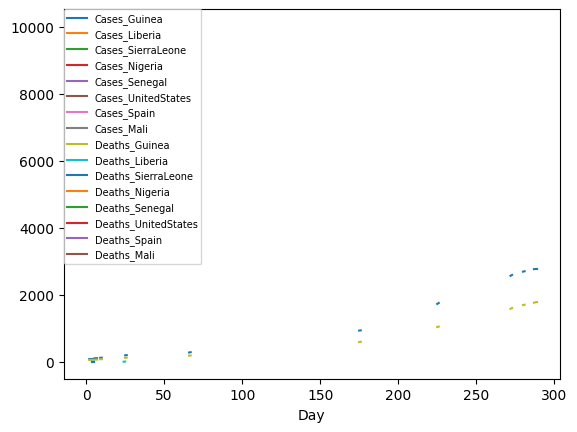

In [86]:
fig,ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()